<a href="https://colab.research.google.com/github/biswa-13/TensorFlow-Practice/blob/master/TransferLearning_Saving_Reloading_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Transfer Learning Step By Step :-
- Import required packages and diclare the variables
- Download the required image dataset and divide into training, testing dataset
- Format the Images to the required size for the model
- Downlaod the feature_extractor layer of the pretrained model
- Add the classifcation layer to the feature_extractor layer 
- Compile the model
- Train the model
- Test the model
*- Save the model


In [1]:
!pip install -U tensorflow_hub
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_hub in /usr/local/lib/python3.6/dist-packages (0.8.0)
     |████████████████████████████████| 3.3MB 87kB/s 
  Found existing installation: tensorflow-datasets 2.1.0
    Uninstalling tensorflow-datasets-2.1.0:
      Successfully uninstalled tensorflow-datasets-2.1.0


In [2]:
# - Import required packages and diclare the variables
print("Start : - Import required packages and diclare the variables")
import numpy as np
import matplotlib.pylab as plt
import PIL.Image as image
import time

import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_hub as hub
import tensorflow_datasets as tfds
tfds.disable_progress_bar()


imgSize = 224
epochs = 6
batchSize = 32
datasetName = "cats_vs_dogs"
preTrainedModelUrl = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4" 

print("Finish : - Import required packages and diclare the variables")

Start : - Import required packages and diclare the variables
Finish : - Import required packages and diclare the variables


In [3]:
# - Download the required image dataset and divide into training, testing dataset
print("Start - Download the required image dataset and divide into training, testing dataset")


(train_dataset, test_dataset), dataset_info = tfds.load(
    datasetName, split = ['train[:80%]', 'train[80%:]'], 
    with_info = True, as_supervised = True
)

print("Finish - Download the required image dataset and divide into training, testing dataset")

Start - Download the required image dataset and divide into training, testing dataset


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteBSWUZX/cats_vs_dogs-train.tfrecord
Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.
Finish - Download the required image dataset and divide into training, testing dataset


In [4]:
print("dataset_info --> \n",dataset_info)

dataset_info --> 
 tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    version=4.0.0,
    description='A large set of images of cats and dogs.There are 1738 corrupted images that are dropped.',
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=23262,
    splits={
        'train': 23262,
    },
    supervised_keys=('image', 'label'),
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    title = {Asirra: A CAPTCHA that Exploits Interest-Aligned Manual Image Categorization},
    booktitle = {Proceedings of 14th ACM Conference on Computer and Communications Secu

In [5]:
# -Format the Images to the required size for the model
print("Start: Format the Images to the required size for the model")
# function to format the image as per the required size
# `hub` image modules exepct their data normalized to the [0,1] range.


def format_image(image, label):
  image = tf.image.resize(image, (imgSize, imgSize))/255.0
  return image, label

num_examples = dataset_info.splits['train'].num_examples
updtd_train_images = train_dataset.shuffle(num_examples//4).map(format_image).batch(batchSize).prefetch(1)
updtd_test_images = test_dataset.map(format_image).batch(batchSize).prefetch(1)


print("Finish: Format the Images to the required size for the model")

Start: Format the Images to the required size for the model
Finish: Format the Images to the required size for the model


In [6]:
# - Downlaod the pretrained model
print("Start: - Downlaod the pretrained model")

# downaloading the feature vector of the mobileNet model
feature_extractor_layer = hub.KerasLayer(preTrainedModelUrl, input_shape = (imgSize, imgSize, 3))
feature_extractor_layer.trainable = False


print("Finish: - Downlaod the pretrained model")

Start: - Downlaod the pretrained model
Finish: - Downlaod the pretrained model


In [7]:
# - Add the classifcation layer to the feature_extractor layer 
print("Start- Add the classifcation layer to the feature_extractor layer ")
dataset_classes = dataset_info.features['label'].num_classes
dataset_labels = dataset_info.features['label'].names

model = tf.keras.Sequential([ 
                             feature_extractor_layer,
                             layers.Dense(2)
#                             layers.Dense(2, activation="softmax")
])
model.summary()

print("finish- - Add the classifcation layer to the feature_extractor layer ")

Start- Add the classifcation layer to the feature_extractor layer 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________
finish- - Add the classifcation layer to the feature_extractor layer 


In [8]:
# - Compile the model
print("Start - Compile the model")

model.compile(
    optimizer="adam",
    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
  )

print("Finish - Compile the model")

Start - Compile the model
Finish - Compile the model


In [9]:
# - Train the model
print("Start: - Train the model")

trainingInfo = model.fit(
    updtd_train_images,
    epochs = epochs,
    validation_data = updtd_test_images
)

print("Finish: - Train the model")


Start: - Train the model
Epoch 1/6
582/582 [==============================] - 39s 68ms/step - loss: 0.0538 - accuracy: 0.9816 - val_loss: 0.0381 - val_accuracy: 0.9877
Epoch 2/6
582/582 [==============================] - 39s 66ms/step - loss: 0.0297 - accuracy: 0.9896 - val_loss: 0.0401 - val_accuracy: 0.9865
Epoch 3/6
582/582 [==============================] - 38s 66ms/step - loss: 0.0250 - accuracy: 0.9918 - val_loss: 0.0402 - val_accuracy: 0.9865
Epoch 4/6
582/582 [==============================] - 39s 66ms/step - loss: 0.0216 - accuracy: 0.9924 - val_loss: 0.0309 - val_accuracy: 0.9912
Epoch 5/6
582/582 [==============================] - 38s 66ms/step - loss: 0.0183 - accuracy: 0.9941 - val_loss: 0.0314 - val_accuracy: 0.9895
Epoch 6/6
582/582 [==============================] - 38s 66ms/step - loss: 0.0167 - accuracy: 0.9948 - val_loss: 0.0335 - val_accuracy: 0.9897
Finish: - Train the model


In [11]:
# Test the single image
doggy3 = "https://scx1.b-cdn.net/csz/news/800/2018/2-dog.jpg"
doggyImg = tf.keras.utils.get_file('doggy3.jpg', doggy3)
doggyImg = image.open(doggyImg).resize((imgSize, imgSize))
doggyImg #displaying the image
doggyImg = np.array(doggyImg)/255.0
doggyImg.shape #displaying the shape of the new image
result = model.predict(doggyImg[np.newaxis, ...])
predictedClass = np.argmax(result[0])
print("\n Prediction Result -->", dataset_labels[predictedClass])



 Prediction Result --> dog


Start : Test the model
Labels:  [1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0]
Predicted labels:  [1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0]
Finish: Test the model


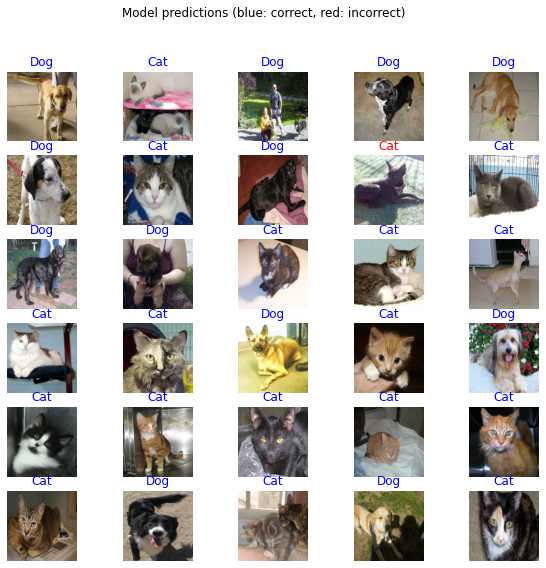

In [12]:
# Optional  ==> Test the model with batch of image data
print("Start : Test the model")
# Get the ordered list of class names.
class_names = np.array(dataset_info.features['label'].names)
class_names
# Run an image batch through the model and convert the indices to class names.
image_batch, label_batch = next(iter(updtd_test_images.take(1)))
image_batch = image_batch.numpy()
label_batch = label_batch.numpy()

predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()
predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = class_names[predicted_ids]
predicted_class_names

print("Labels: ", label_batch)
print("Predicted labels: ", predicted_ids)


plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(predicted_class_names[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")
print("Finish: Test the model")

In [0]:
# Saving/Exporting the model for future use
# This file includes:
# - The model's architecture
# - The model's weight values (which were learned during training)
# - The model's training config (what you passed to `compile`), if any
# - The optimizer and its state, if any (this enables you to restart training where you left off)
saveModelAs = "dog_cat_classifier.h5"
model.save(saveModelAs)

In [16]:
# Loading/importing the saved model
savedModel = tf.keras.models.load_model(
  saveModelAs, 
  # `custom_objects` tells keras how to load a `hub.KerasLayer`
  custom_objects={'KerasLayer': hub.KerasLayer})

savedModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [25]:
# Doing prediction by using the saved model
kitty3 = "https://cdn.mos.cms.futurecdn.net/otjbibjaAbiifyN9uVaZyL-650-80.jpg"
kittyImg = tf.keras.utils.get_file('kitty3.jpg', kitty3)
kittyImg = image.open(kittyImg).resize((imgSize, imgSize))
kittyImg #displaying the image
kittyImg = np.array(kittyImg)/255.0
kittyImg.shape #displaying the shape of the new image
result = savedModel.predict(kittyImg[np.newaxis, ...])
predictedClass = np.argmax(result[0])
print("Prediction Result -->", dataset_labels[predictedClass])

Prediction Result --> cat


In [0]:
# Training the saved model
#  We can also train the savedmodel after loading it we only need to run the "model.fit()" because the saved model already contains previous informations
history = savedModel.fit(
    updtd_train_images,
    epochs = 2,
    validation_data = updtd_test_images
)
#history.summary()

In [50]:
## Exporintg/Saving a model using the tf.saved_model.save() it is the more powerful method to save a model becuase 
#  by saving a model with this method the model can be easily converted to the tensoflowLite and tensorflow.js format

export_save_model = "dog_cat_classifier_save_model"
tf.saved_model.save(model, export_save_model)
!zip dog_cat_classifier_save_model.zip dog_cat_classifier_save_model -r

INFO:tensorflow:Assets written to: dog_cat_classifier_save_model/assets


INFO:tensorflow:Assets written to: dog_cat_classifier_save_model/assets


  adding: dog_cat_classifier_save_model/ (stored 0%)
  adding: dog_cat_classifier_save_model/saved_model.pb (deflated 92%)
  adding: dog_cat_classifier_save_model/assets/ (stored 0%)
  adding: dog_cat_classifier_save_model/variables/ (stored 0%)
  adding: dog_cat_classifier_save_model/variables/variables.data-00001-of-00002 (deflated 7%)
  adding: dog_cat_classifier_save_model/variables/variables.data-00000-of-00002 (deflated 88%)
  adding: dog_cat_classifier_save_model/variables/variables.index (deflated 79%)


In [58]:
# loading.importing the saved_model
imported_saved_model = tf.keras.models.load_model(
    export_save_model,
    custom_objects = {'KerasLayer': hub.KerasLayer}
)
imported_saved_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,226,434
Non-trainable params: 34,112
_________________________________________________________________


In [61]:

# Doing prediction by using the saved model
doggy33 = "https://cdn.mos.cms.futurecdn.net/QjuZKXnkLQgsYsL98uhL9X-650-80.jpg"
doggyImg3 = tf.keras.utils.get_file('doggy33.jpg', doggy33)
doggyImg3 = image.open(doggyImg3).resize((imgSize, imgSize))
doggyImg3 #displaying the image
doggyImg3 = np.array(doggyImg3)/255.0
doggyImg3.shape #displaying the shape of the new image
result = imported_saved_model.predict(doggyImg3[np.newaxis, ...])
predictedClass1 = np.argmax(result[0])
print("\n Prediction Result -->", dataset_labels[predictedClass1])


 Prediction Result --> dog
